#Section 1. Theory

In [103]:
import numpy as np

X = np.array([[1, -2] ,[1 , -5], [1,-3], [1, 0], [1,-8], [1,-2], [1,1],[1,5],[1,-1], [1,6]])
Y = np.array([1,-4,1,3,11,5,0,-1,-3,1])

thetas = np.linalg.inv(X.T @ X) @ X.T @ Y
for idx, theta in enumerate(thetas):
  print(f'theta_{idx}: {theta:0.4f}')


theta_0: 1.0286
theta_1: -0.4127


In [104]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, Y)
for idx, x in enumerate(reg.coef_):
  print(f'x_{idx}: {x:0.4f}')
print(f'intercept: {reg.intercept_:0.4f}')

x_0: 0.0000
x_1: -0.4127
intercept: 1.0286


$y = 1.0286 - 0.4127x_{1}$

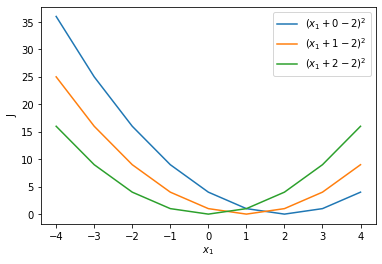

In [105]:
import matplotlib.pyplot as plt

x1 = list(range(-4,5))
x2 = [0, 1, 2]
J = lambda x1, x2: (x1 + x2 - 2)**2
plt.xlabel('$x_1$')
plt.ylabel('J')
for idx, i in enumerate(x2):
  l = []
  for j in x1:
    l.append(J(j,i))
  plt.plot(x1, l)
plt.legend(['$(x_1 + 0 - 2)^2$','$(x_1 + 1 - 2)^2$','$(x_1 + 2 - 2)^2$'])
plt.show()

#Section 2. Closed Form Linear Regression



> Import Necessary Libraries



In [106]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

> Reading in the Data
>> Randomizing the Data

>> Splitting the data into X and Y vectors

In [107]:
# Read in the data
data = np.genfromtxt('x06Simple.csv', delimiter=',', skip_header=1, usecols=(1,2,3))
dataMat = np.array(data)
# Set RNG with seed = 0
np.random.seed(0)
np.random.shuffle(dataMat)
# Splitting the data into X and Y vectors
X = dataMat[:, :-1]
Y =  np.reshape(dataMat[:, -1], (-1, 1))

> Train-Test Split on the data

In [108]:
# Split the training and testing sets in a 2:1 ratio
n = ceil(X.shape[0] * 2 /3)
trainX, testX = np.split(X, [n,])
trainY, testY = np.split(Y, [n,])

> Standardizing the Data using the training data
>> Take the mean and the standard deviation

In [109]:
mean = trainX.mean(axis=0)
std = trainX.std(axis=0, ddof=1)
trainX_std = (trainX - mean) / std
bias = np.ones((trainX_std.shape[0], 1))
x = np.append(bias, trainX_std , axis=1)
y = trainY

Find Thetas

In [110]:
thetas = np.linalg.inv(x.T @ x) @ (x.T @ y)
res = "$y = "
for idx, theta in enumerate(thetas):
  if idx == 0:
    res += f'{theta[0]:= 0.4f}'
  else:
    res += f' {theta[0]:=+0.4f}x_{idx}'
res += "$"
  
print(res)

$y =  3275.6667 +1097.6031x_1 -259.3279x_2$


$y = 3275.6667 + 1097.6031x_{1} -259.3279x_{2}$

Define RMSE

In [111]:
def RMSE(thetas, x, y, mean, std):
    x_std = (x - mean) / std
    x = np.append(np.ones((x_std.shape[0], 1)), x_std , axis=1)
    diff = np.array(y - (x @ thetas))
    return np.sqrt((diff ** 2).mean())

print(f'RMSE = {RMSE(thetas, testX, testY, mean, std):0.4f}')

RMSE = 601.9303


#Section 3. Locally-Weighted Linear Regression

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [113]:
# Read in the data
data = np.genfromtxt('x06Simple.csv', delimiter=',', skip_header=1, usecols=(1,2,3))
dataMat = np.array(data)
# Set RNG with seed = 0
np.random.seed(0)
np.random.shuffle(dataMat)
# Splitting the data into X and Y vectors
X = dataMat[:, :-1]
Y =  np.reshape(dataMat[:, -1], (-1, 1))

In [114]:
trainX, testX, trainY, testY = tts(X, Y, test_size=0.33, random_state=1, shuffle=False)

In [115]:
mean = trainX.mean(axis=0)
std = trainX.std(axis=0, ddof=1)
trainX_std = (trainX - mean) / std
testX_std = (testX - mean) / std
bias = np.ones((trainX_std.shape[0], 1))
x = np.append(bias, trainX_std , axis=1)
y = trainY

In [116]:

num_rows_trainX = trainX_std.shape[0]
predictions = []
k = 1
k2 = k**2
for testX_data_row in testX_std:
    # create identity matrix
    W = np.mat(np.eye(num_rows_trainX))
    # set diagonal values
    for idx, train_x in enumerate(trainX_std):
        W[idx, idx] = np.exp(  (-np.absolute(testX_data_row - train_x)/k2).sum() )

    # create and add bias feature to standardized training data Xmat
    bias_train = np.ones(num_rows_trainX).reshape(num_rows_trainX, 1)
    Xnew = np.append(bias_train, trainX_std, axis=1)
    # create and add bias feature to standardized testing data Xmat
    testX_data_row = np.reshape(testX_data_row, (-1, 2))
    bias_test = np.ones(testX_data_row.shape[0]).reshape(testX_data_row.shape[0], 1)
    testX_data_row = np.append(bias_test, testX_data_row, axis=1)
    # calculate theta
    theta = np.linalg.inv(Xnew.T @ W @ Xnew) @ (Xnew.T @ W @ trainY)
    prediction = testX_data_row @ theta

    predictions.append(prediction)
predictions = np.array(predictions).reshape((-1, 1))
rmse = np.sqrt(((testY - predictions) ** 2).mean())
print(f'RMSE = {rmse:0.4f}')

RMSE = 323.1185


#Section 4. Gradient Descent

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [118]:
# Read in the data
data = np.genfromtxt('x06Simple.csv', delimiter=',', skip_header=1, usecols=(1,2,3))
dataMat = np.array(data)
# Set RNG with seed = 0
np.random.seed(0)
np.random.shuffle(dataMat)
# Splitting the data into X and Y vectors
X = dataMat[:, :-1]
Y =  np.reshape(dataMat[:, -1], (-1, 1))

In [119]:
trainX, testX, trainY, testY = tts(X, Y, test_size=0.33, random_state=1, shuffle=False)

In [120]:
mean = trainX.mean(axis=0)
std = trainX.std(axis=0, ddof=1)
trainX_std = (trainX - mean) / std
testX_std = (testX - mean) / std
bias = np.ones((trainX_std.shape[0], 1))
x = np.append(bias, trainX_std , axis=1)
y = trainY

In [121]:
eta = 0.01
i = 0
term = 2 ** -23
rmseTrain = lambda thetas: RMSE(thetas, x=trainX, y=trainY,  mean=mean, std=std)
rmseTest = lambda thetas: RMSE(thetas, x=testX, y=testY, mean=mean, std=std)
thetas = np.random.uniform(-1, 1, (3, 1))

rmse_test = [rmseTest(thetas)]
rmse_train = [rmseTrain(thetas)]
while i < 1000:
  gradient = 2 * x.T @ ((x @ thetas) - y)
  # update thetas by batch gradient descent
  thetas -= eta / trainX.shape[0] * gradient
  rmse_test.append(rmseTest(thetas))
  rmse_train.append(rmseTrain(thetas))
  if np.abs(rmse_test[i+1] - rmse_test[i]) / rmse_test[i] < term:
    break
  i+=1
rmse = rmse_test[i+1]

res = "$y = "
for idx, theta in enumerate(thetas):
  print(f'theta_{idx}: {theta[0]:0.4f}')
  if idx == 0:
    res += f'{theta[0]:= 0.4f}'
  else:
    res += f' {theta[0]:=+0.4f}x_{idx}'
res += "$"
  
print(res)
print(f'RMSE = {rmse:0.4f}')

theta_0: 3343.2651
theta_1: 1036.6251
theta_2: -295.6675
$y =  3343.2651 +1036.6251x_1 -295.6675x_2$
RMSE = 653.7564


# $y =  3343.2651 +1036.6251x_1 -295.6675x_2$
# RMSE = 653.7564

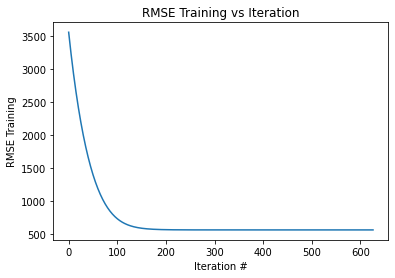

In [122]:
import matplotlib.pyplot as plt

plt.xlabel('Iteration #')
plt.ylabel('RMSE Training')
plt.title('RMSE Training vs Iteration')
plt.plot(list(range(len(rmse_train))), rmse_train)
plt.show()

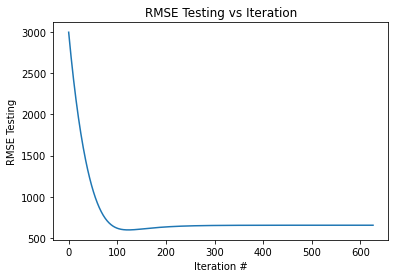

In [123]:
import matplotlib.pyplot as plt

plt.xlabel('Iteration #')
plt.ylabel('RMSE Testing')
plt.title('RMSE Testing vs Iteration')
plt.plot(list(range(len(rmse_test))), rmse_test)
plt.show()